In [76]:
import matplotlib.pyplot as plt # plotting
import numpy as np              # working with number arrays etc.
from netCDF4 import Dataset     # reading netcdf files
from numpy import trapz         # for integration

# all file paths: change according to file location
path_les="/Users/amrapallig/run/cvmix_analysis/les/"
path_adc="/Users/amrapallig/Desktop/cvmix/adc/convection/"
path_kpp="/Users/amrapallig/run/cvmix_analysis/les/KPP-CVMix/"
path_ke="/Users/amrapallig/run/cvmix_analysis/les/K-EPSILON-SG/"

In [77]:

# density calculation from given temp and salinity
def density_eos(t,s):
    density= 1026.0*(1.0-2e-4*(t-20)+8e-4*(s-35))
    return density

#rate of change of depth integrated potential energy calculation
def pot_energy2(temperature_0,temperature_t,salinity_0,salinity_t,depth,dtdz,dsdz,t=95):
    
    
    temperature_0=temperature_0[:-1]
    temperature_t=temperature_t[:-1]
    salinity_0=salinity_0[:-1]
    salinity_t=salinity_t[:-1]
    depth=depth[:-1]
    
    
    ind=np.where((depth)>=-100)  ##plots are weird with, 5 m doing worse than 10m if whole depth 100m is selected
                                ## thats why I am taking depth till -75
    depth=depth[ind]
    #for initial time
    print(depth)
    # defined initial profiles as data saved for les and adc are from 1 hr and 
    # for kpp and kepsilon are from zero hr
    #temp=20+dtdz*depth
    #salt=35+dsdz*depth 
    #temp=temperature_0
   # salt=salinity_0



    temp=temperature_0[ind]
    salt=salinity_0[ind]
    density= density_eos(temp,salt)
    # depth integrated potential energy PE=density*9.81*depth
    area=trapz(density*9.81*depth,depth)
    PE_0=area  #/(depth[0]-depth[-1])
    #print(PE_0)
    
    #for final time
    #temp=temperature_t
    #salt=salinity_t
    temp=temperature_t[ind]
    salt=salinity_t[ind]
    density= density_eos(temp,salt)
    plt.plot(density,depth)
    # depth integrated potential energy PE=density*9.81*depth
    # area under PE
    area=trapz(density*9.81*depth,depth)
    PE_t=area  #/(depth[0]-depth[-1])
    PE_rate_change=(PE_t-PE_0)/(3600*t)  # in Watt/m^2
    #print(PE_t)
    return (PE_rate_change)


In [78]:

#rate of change of depth integrated potential energy calculation
def pot_energy2_10monly(temperature_0,temperature_t,salinity_0,salinity_t,depth,dtdz,dsdz,t=95):
    ind=np.where((depth)>=-110)  ##plots are weird with, 5 m doing worse than 10m if whole depth 100m is selected
                                ## thats why I am taking depth till -75
    depth=depth[ind]
    #for initial time
    #print(depth)
    temp=temperature_0[ind]
    salt=salinity_0[ind]
    density= density_eos(temp,salt)
    # depth integrated potential energy PE=density*9.81*depth
    area=trapz(density*9.81*depth,depth)
    PE_0=area  #/(depth[0]-depth[-1])
   
    
    #for final time
    #temp=temperature_t
    #salt=salinity_t
    temp=temperature_t[ind]
    salt=salinity_t[ind]
    density= density_eos(temp,salt)
    plt.plot(density,depth)
    # depth integrated potential energy PE=density*9.81*depth
    # area under PE
    area=trapz(density*9.81*depth,depth)
    PE_t=area  #/(depth[0]-depth[-1])
    PE_rate_change=(PE_t-PE_0)/(3600*t)  # in Watt/m^2
    #print(PE_t)
    return (PE_rate_change)


[ -0.1         -0.30063632  -0.50254935  -0.70574719  -0.91023803
  -1.1160301   -1.32313168  -1.53155112  -1.74129665  -1.95237696
  -2.16480041  -2.37857556  -2.59371114  -2.81021547  -3.02809739
  -3.24736595  -3.46802974  -3.69009781  -3.91357875  -4.13848162
  -4.36481571  -4.59259033  -4.82181406  -5.05249643  -5.28464651
  -5.51827431  -5.7533884   -5.98999834  -6.22811413  -6.4677453
  -6.70890093  -6.95159149  -7.19582605  -7.44161463  -7.6889677
  -7.93789434  -8.18840504  -8.4405098   -8.69421864  -8.94954205
  -9.20649052  -9.46507359  -9.72530174  -9.98718643 -10.25073719
 -10.51596546 -10.78288078 -11.0514946  -11.32181835 -11.59386158
 -11.86763668 -12.14315319 -12.42042255 -12.69945717 -12.98026657
 -13.26286316 -13.54725742 -13.83346272 -14.12148762 -14.41134644
 -14.70304966 -14.99660873 -15.2920351  -15.58934212 -15.88854122
 -16.18964386 -16.49266243 -16.79760933 -17.104496   -17.4133358
 -17.72414207 -18.03692436 -18.35169792 -18.6684742  -18.98726654
 -19.3080864 

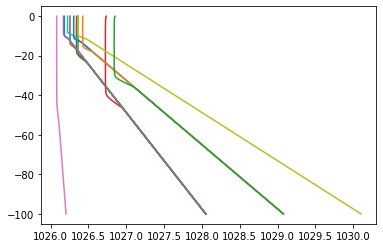

In [79]:
# time step
t = 95  # as KPP and KE have 95 hrs of data stratibg from zero
# range of time for averaging
t1 = t-24

# LES
#path_les="/Users/amrapalli/runs/cvmix/cvmix_analysis/les/"
results_les = {}
#vertical resolutions
#datasets = [1, 2, 5, 10] 
# list comprehension
file_names = [*[f"Cooling{x}" for x in [1, 2, 4, 16]], 
              *[f"Evap{x}" for x in [1, 4]],
              *[f"Strat{x}" for x in [1, 10, 20]],
              *[f"T1S{x}" for x in [0, 1, 3, 15]],
             ]

#file_names
for fn in file_names:
    les= Dataset(path_les+f'{fn}.nc', mode='r')

#         # compute pot
    
    if "Cooling" in fn:
        fn = fn.replace("Cooling", "c")
        dtdz=0.1; dsdz=0.0
    if "Evap" in fn:
        fn = fn.replace("Evap", "e")
        dtdz=0.0; dsdz=-0.025
    if "Strat" in fn:
        fn = fn.replace("Strat", "s")
        if "10" in fn:
            dtdz=0.1; dsdz=0.0
        elif "1" in fn:
            dtdz=0.01; dsdz=0.0
        elif "20" in fn:
            dtdz=0.2; dsdz=0.0
        else: 
            print("error")
    if "T1S" in fn:
        fn = fn.replace("T1S", "t1s")
        dtdz=0.05; dsdz=-0.025
    #print(fn,dtdz,dsdz)
    results_les[f"pe_{fn}_les"] = pot_energy2(les.variables["temp"][0,:-1],
                                              np.nanmean(les.variables["temp"][t1:t,:-1],axis=0),
                                              les.variables["salt"][0,:-1],
                                              np.nanmean(les.variables["salt"][t1:t,:-1],axis=0),
                                              les.variables['zm'][:-1],
                                              dtdz,
                                              dsdz)
#results_les

[ -0.5  -1.5  -2.5  -3.5  -4.5  -5.5  -6.5  -7.5  -8.5  -9.5 -10.5 -11.5
 -12.5 -13.5 -14.5 -15.5 -16.5 -17.5 -18.5 -19.5 -20.5 -21.5 -22.5 -23.5
 -24.5 -25.5 -26.5 -27.5 -28.5 -29.5 -30.5 -31.5 -32.5 -33.5 -34.5 -35.5
 -36.5 -37.5 -38.5 -39.5 -40.5 -41.5 -42.5 -43.5 -44.5 -45.5 -46.5 -47.5
 -48.5 -49.5 -50.5 -51.5 -52.5 -53.5 -54.5 -55.5 -56.5 -57.5 -58.5 -59.5
 -60.5 -61.5 -62.5 -63.5 -64.5 -65.5 -66.5 -67.5 -68.5 -69.5 -70.5 -71.5
 -72.5 -73.5 -74.5 -75.5 -76.5 -77.5 -78.5 -79.5 -80.5 -81.5 -82.5 -83.5
 -84.5 -85.5 -86.5 -87.5 -88.5 -89.5 -90.5 -91.5 -92.5 -93.5 -94.5 -95.5
 -96.5 -97.5 -98.5]
[ -1.  -3.  -5.  -7.  -9. -11. -13. -15. -17. -19. -21. -23. -25. -27.
 -29. -31. -33. -35. -37. -39. -41. -43. -45. -47. -49. -51. -53. -55.
 -57. -59. -61. -63. -65. -67. -69. -71. -73. -75. -77. -79. -81. -83.
 -85. -87. -89. -91. -93. -95. -97.]
[ -2.5  -7.5 -12.5 -17.5 -22.5 -27.5 -32.5 -37.5 -42.5 -47.5 -52.5 -57.5
 -62.5 -67.5 -72.5 -77.5 -82.5 -87.5 -92.5]
[ -5. -15. -25. -35. -45. -55

[ -2.5  -7.5 -12.5 -17.5 -22.5 -27.5 -32.5 -37.5 -42.5 -47.5 -52.5 -57.5
 -62.5 -67.5 -72.5 -77.5 -82.5 -87.5 -92.5]
[ -5. -15. -25. -35. -45. -55. -65. -75. -85.]
[ -0.5  -1.5  -2.5  -3.5  -4.5  -5.5  -6.5  -7.5  -8.5  -9.5 -10.5 -11.5
 -12.5 -13.5 -14.5 -15.5 -16.5 -17.5 -18.5 -19.5 -20.5 -21.5 -22.5 -23.5
 -24.5 -25.5 -26.5 -27.5 -28.5 -29.5 -30.5 -31.5 -32.5 -33.5 -34.5 -35.5
 -36.5 -37.5 -38.5 -39.5 -40.5 -41.5 -42.5 -43.5 -44.5 -45.5 -46.5 -47.5
 -48.5 -49.5 -50.5 -51.5 -52.5 -53.5 -54.5 -55.5 -56.5 -57.5 -58.5 -59.5
 -60.5 -61.5 -62.5 -63.5 -64.5 -65.5 -66.5 -67.5 -68.5 -69.5 -70.5 -71.5
 -72.5 -73.5 -74.5 -75.5 -76.5 -77.5 -78.5 -79.5 -80.5 -81.5 -82.5 -83.5
 -84.5 -85.5 -86.5 -87.5 -88.5 -89.5 -90.5 -91.5 -92.5 -93.5 -94.5 -95.5
 -96.5 -97.5 -98.5]
[ -1.  -3.  -5.  -7.  -9. -11. -13. -15. -17. -19. -21. -23. -25. -27.
 -29. -31. -33. -35. -37. -39. -41. -43. -45. -47. -49. -51. -53. -55.
 -57. -59. -61. -63. -65. -67. -69. -71. -73. -75. -77. -79. -81. -83.
 -85. -87. -89. -91

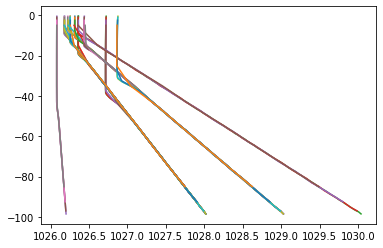

In [80]:
# ADC
#path_adc="/Users/amrapalli/runs/cvmix/cvmix_analysis/adc/convection/"
results_adc = {}
resolutions = [1, 2, 5, 10]
#resolutions = [10]
file_names = ["c1", "c2", "c4", "c16", 
              "e1", "e4", 
              "s1", "s10", "s20", 
              "t1s0", "t1s1", "t1s3", "t1s15"]

for fn in file_names:
    for n in resolutions:
        
        
        if "16"  in  fn and n == 1:
            mf = Dataset(path_adc+f'adcTurbulenceArrays_{fn}_{n}m_test3.nc', mode='r')
            fh = Dataset(path_adc+f'output.0001-01-01_00.00_{fn}_{n}m_test3.nc', mode='r')
        elif  "t1s15" == fn  and n == 1:  
            mf = Dataset(path_adc+f'adcTurbulenceArrays_{fn}_{n}m_test2_dtp5.nc', mode='r')
            fh = Dataset(path_adc+f'output.0001-01-01_00.00_{fn}_{n}m_test2_dtp5.nc', mode='r')
        else:
            mf = Dataset(path_adc+f'adcTurbulenceArrays_{fn}_{n}m_test2.nc', mode='r')  
            fh = Dataset(path_adc+f'output.0001-01-01_00.00_{fn}_{n}m_test2.nc', mode='r')

        if "c" in fn:
            dtdz=0.1; dsdz=0.0
        if "e" in fn:
            dtdz=0.0; dsdz=-0.025
        if "s" in fn:
            if "10" in fn:
                dtdz=0.1; dsdz=0.0
            elif "1" in fn:
                dtdz=0.01; dsdz=0.0
            elif "20" in fn:
                dtdz=0.2; dsdz=0.0
            else: 
                print("error")
        if "t1s" in fn:
            dtdz=0.05; dsdz=-0.025
                         
        # compute pot
        results_adc[f"pe_{fn}_{n}m"] = pot_energy2(mf.variables["temperature"][0,0,:],
                                                   np.nanmean(mf.variables["temperature"][t1:t,0,:],axis=0),
                                                   mf.variables["salinity"][0,0,:],
                                                  np.nanmean(mf.variables["salinity"][t1:t,0,:],axis=0),
                                                  fh.variables['zMid'][0,0,:],
                                                  dtdz,
                                                  dsdz)
#results_adc

(array([-0.0002,  0.    ,  0.0002,  0.0004,  0.0006,  0.0008,  0.001 ,
         0.0012]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

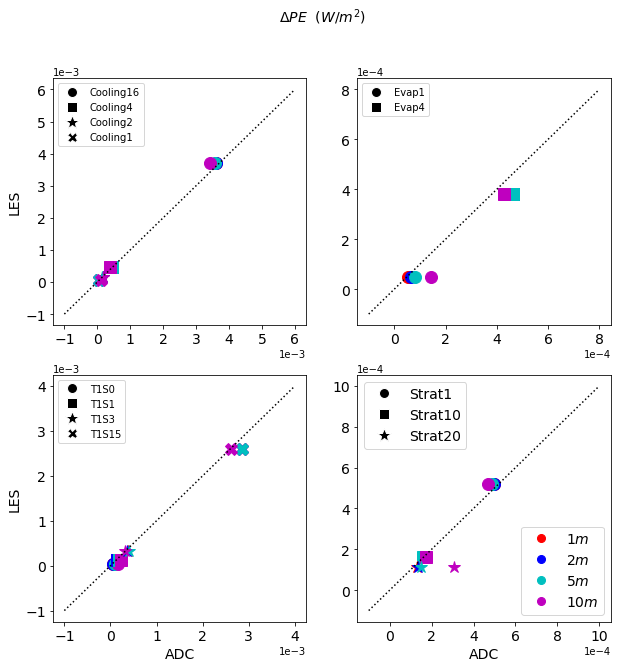

In [81]:
plt.figure(figsize=(10,10))
mks=12
plt.subplot(221)
plt.plot(results_adc["pe_c16_1m"],results_les["pe_c16_les"],'or',markersize=mks)
plt.plot(results_adc["pe_c16_2m"],results_les["pe_c16_les"],'ob',markersize=mks)
plt.plot(results_adc["pe_c16_5m"],results_les["pe_c16_les"],'oc',markersize=mks)
plt.plot(results_adc["pe_c16_10m"],results_les["pe_c16_les"],'om',markersize=mks)

plt.plot(results_adc["pe_c4_1m"],results_les["pe_c4_les"],'sr',markersize=mks)
plt.plot(results_adc["pe_c4_2m"],results_les["pe_c4_les"],'sb',markersize=mks)
plt.plot(results_adc["pe_c4_5m"],results_les["pe_c4_les"],'sc',markersize=mks)
plt.plot(results_adc["pe_c4_10m"],results_les["pe_c4_les"],'sm',markersize=mks)

plt.plot(results_adc["pe_c2_1m"],results_les["pe_c2_les"],'*r',markersize=mks)
plt.plot(results_adc["pe_c2_2m"],results_les["pe_c2_les"],'*b',markersize=mks)
plt.plot(results_adc["pe_c2_5m"],results_les["pe_c2_les"],'*c',markersize=mks)
plt.plot(results_adc["pe_c2_10m"],results_les["pe_c2_les"],'*m',markersize=mks)

plt.plot(results_adc["pe_c1_1m"],results_les["pe_c1_les"],'Xr',markersize=mks)
plt.plot(results_adc["pe_c1_2m"],results_les["pe_c1_les"],'Xb',markersize=mks)
plt.plot(results_adc["pe_c1_5m"],results_les["pe_c1_les"],'Xc',markersize=mks)
plt.plot(results_adc["pe_c1_10m"],results_les["pe_c1_les"],'Xm',markersize=mks)

#plt.ticklabel_format(axis="both", style="sci", scilimits=(-2,-2))
plt.plot([-0.001,6*1e-3],[-0.001,6*1e-3],':k')
legend1=plt.legend(["1m","2m","5m","10m"],loc=4)
plt.ylabel("LES",fontsize=14)
#plt.title("square: c1, circle: c2, star:c4, cross:c16",fontsize=14)
#plt.xscale("log")
#plt.yscale("log")

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cooling16',markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='s', color='w', label='Cooling4',markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='*', color='w', label='Cooling2',markerfacecolor='k', markersize=15),
                    Line2D([0], [0], marker='X', color='w', label='Cooling1',markerfacecolor='k', markersize=10)]
                      
legend2=plt.legend(handles=legend_elements,loc=2)
#plt.gca().add_artist(legend1)
plt.ticklabel_format(axis="both", style="sci", scilimits=(-3,-3))

plt.subplot(222)
plt.plot(results_adc["pe_e1_1m"],results_les["pe_e1_les"],'or',markersize=mks)
plt.plot(results_adc["pe_e1_2m"],results_les["pe_e1_les"],'ob',markersize=mks)
plt.plot(results_adc["pe_e1_5m"],results_les["pe_e1_les"],'oc',markersize=mks)
plt.plot(results_adc["pe_e1_10m"],results_les["pe_e1_les"],'om',markersize=mks)

plt.plot(results_adc["pe_e4_1m"],results_les["pe_e4_les"],'sr',markersize=mks)
plt.plot(results_adc["pe_e4_2m"],results_les["pe_e4_les"],'sb',markersize=mks)
plt.plot(results_adc["pe_e4_5m"],results_les["pe_e4_les"],'sc',markersize=mks)
plt.plot(results_adc["pe_e4_10m"],results_les["pe_e4_les"],'sm',markersize=mks)
legend1=plt.legend(["1m","2m","5m","10m"],loc=4)
#plt.ticklabel_format(axis="both", style="sci", scilimits=(-2,-2))
plt.plot([-0.0001,8*1e-4],[-0.0001,8*1e-4],':k')
#plt.title("square: e1, circle: e4",fontsize=14)
#plt.xscale("log")
#plt.yscale("log")

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Evap1',markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='s', color='w', label='Evap4',markerfacecolor='k', markersize=10)]
                  
                      
legend2=plt.legend(handles=legend_elements,loc=2)
#plt.gca().add_artist(legend1)
plt.ticklabel_format(axis="both", style="sci", scilimits=(-4,-4))

plt.subplot(223)
plt.plot(results_adc["pe_t1s0_1m"],results_les["pe_t1s0_les"],'or',markersize=mks)
plt.plot(results_adc["pe_t1s0_2m"],results_les["pe_t1s0_les"],'ob',markersize=mks)
plt.plot(results_adc["pe_t1s0_5m"],results_les["pe_t1s0_les"],'oc',markersize=mks)
plt.plot(results_adc["pe_t1s0_10m"],results_les["pe_t1s0_les"],'om',markersize=mks)

plt.plot(results_adc["pe_t1s1_1m"],results_les["pe_t1s1_les"],'sr',markersize=mks)
plt.plot(results_adc["pe_t1s1_2m"],results_les["pe_t1s1_les"],'sb',markersize=mks)
plt.plot(results_adc["pe_t1s1_5m"],results_les["pe_t1s1_les"],'sc',markersize=mks)
plt.plot(results_adc["pe_t1s1_10m"],results_les["pe_t1s1_les"],'sm',markersize=mks)

plt.plot(results_adc["pe_t1s3_1m"],results_les["pe_t1s3_les"],'*r',markersize=mks)
plt.plot(results_adc["pe_t1s3_2m"],results_les["pe_t1s3_les"],'*b',markersize=mks)
plt.plot(results_adc["pe_t1s3_5m"],results_les["pe_t1s3_les"],'*c',markersize=mks)
plt.plot(results_adc["pe_t1s3_10m"],results_les["pe_t1s3_les"],'*m',markersize=mks)

plt.plot(results_adc["pe_t1s15_1m"],results_les["pe_t1s15_les"],'Xr',markersize=mks)
plt.plot(results_adc["pe_t1s15_2m"],results_les["pe_t1s15_les"],'Xb',markersize=mks)
plt.plot(results_adc["pe_t1s15_5m"],results_les["pe_t1s15_les"],'Xc',markersize=mks)
plt.plot(results_adc["pe_t1s15_10m"],results_les["pe_t1s15_les"],'Xm',markersize=mks)

#plt.ticklabel_format(axis="both", style="sci", scilimits=(-1,-1))
plt.plot([-0.001,4*1e-3],[-0.001,4*1e-3],':k')
legend1=plt.legend(["1m","2m","5m","10m"],loc=4)
plt.ylabel("LES",fontsize=14)
plt.xlabel("ADC",fontsize=14)
#plt.title("square: t1s0, circle: t1s1, star:t1s3, cross:t1s15",fontsize=14)
#plt.xscale("log")
#plt.yscale("log")
plt.ticklabel_format(axis="both", style="sci", scilimits=(-3,-3))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='T1S0',markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='s', color='w', label='T1S1',markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='*', color='w', label='T1S3',markerfacecolor='k', markersize=15),
                    Line2D([0], [0], marker='X', color='w', label='T1S15',markerfacecolor='k', markersize=10)]
                      
legend2=plt.legend(handles=legend_elements,loc=2)
#plt.gca().add_artist(legend1)

plt.subplot(224)
plt.plot(results_adc["pe_s1_1m"],results_les["pe_s1_les"],'or',markersize=mks)#, markerfacecolor='none')
plt.plot(results_adc["pe_s1_2m"],results_les["pe_s1_les"],'ob',markersize=mks)#, markerfacecolor='none')
plt.plot(results_adc["pe_s1_5m"],results_les["pe_s1_les"],'oc',markersize=mks)#, markerfacecolor='none')
plt.plot(results_adc["pe_s1_10m"],results_les["pe_s1_les"],'om',markersize=mks)#, markerfacecolor='none')

plt.plot(results_adc["pe_s10_1m"],results_les["pe_s10_les"],'sr',markersize=mks)
plt.plot(results_adc["pe_s10_2m"],results_les["pe_s10_les"],'sb',markersize=mks)
plt.plot(results_adc["pe_s10_5m"],results_les["pe_s10_les"],'sc',markersize=mks)
plt.plot(results_adc["pe_s10_10m"],results_les["pe_s10_les"],'sm',markersize=mks)

plt.plot(results_adc["pe_s20_1m"],results_les["pe_s20_les"],'*r',markersize=mks)
plt.plot(results_adc["pe_s20_2m"],results_les["pe_s20_les"],'*b',markersize=mks)
plt.plot(results_adc["pe_s20_5m"],results_les["pe_s20_les"],'*c',markersize=mks)
plt.plot(results_adc["pe_s20_10m"],results_les["pe_s20_les"],'*m',markersize=mks)

#plt.ticklabel_format(axis="both", style="sci", scilimits=(-2,-2))
plt.plot([-0.0001,1*1e-3],[-0.0001,1*1e-3],':k')

legend1=plt.legend(["1m","2m","5m","10m"],loc=4)
plt.xlabel("ADC",fontsize=14)
#plt.title("square: s1, circle: s10, star:s20",fontsize=14)
plt.suptitle("$\Delta PE$  $(W/m^2)$",fontsize=14)

#plt.xscale("log")
#plt.yscale("log")
plt.ticklabel_format(axis="both", style="sci", scilimits=(-4,-4))


from matplotlib.patches import Patch
from matplotlib.lines import Line2D

from matplotlib.patches import Patch
from matplotlib.lines import Line2D


legend_elements2 = [ Line2D([0], [0], marker='o', color='w', label='$1 m$',markeredgecolor='r',markerfacecolor='r', markersize=8),
                  Line2D([0], [0], marker='o', color='w', label='$2 m$',markeredgecolor='b',markerfacecolor='b', markersize=8),
                  Line2D([0], [0], marker='o', color='w', label='$5 m$',markeredgecolor='c',markerfacecolor='c', markersize=8),
                  Line2D([0], [0], marker='o', color='w', label='$10 m$',markeredgecolor='m',markerfacecolor='m', markersize=8)]

legend3=plt.legend(handles=legend_elements2,loc=4,fontsize=14)
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Strat1',markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='s', color='w', label='Strat10',markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='*', color='w', label='Strat20',markerfacecolor='k', markersize=15),]
                 
legend=plt.legend(handles=legend_elements,loc=2,fontsize=14)

plt.gca().add_artist(legend3)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


(array([5.0e-05, 1.0e-04, 1.5e-04, 2.0e-04, 2.5e-04, 3.0e-04, 3.5e-04,
        4.0e-04, 4.5e-04, 5.0e-04, 5.5e-04]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

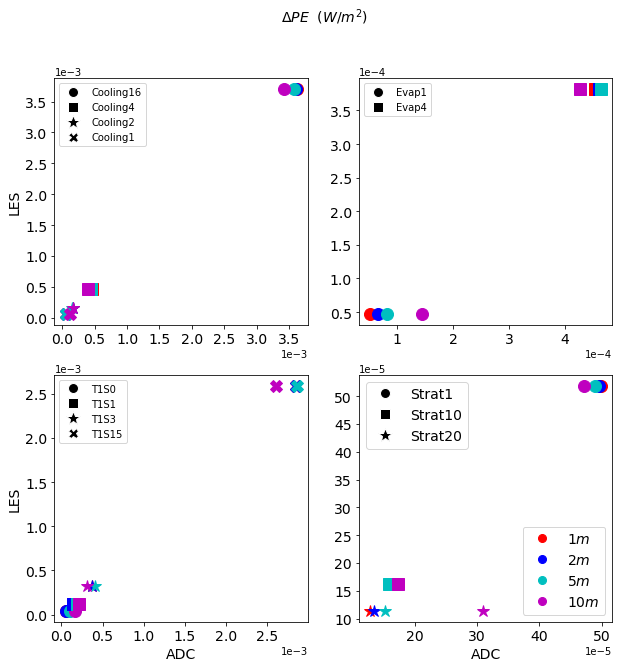

In [82]:
plt.figure(figsize=(10,10))
mks=12
plt.subplot(221)
plt.plot(results_adc["pe_c16_1m"],results_les["pe_c16_les"],'or',markersize=mks)
plt.plot(results_adc["pe_c16_2m"],results_les["pe_c16_les"],'ob',markersize=mks)
plt.plot(results_adc["pe_c16_5m"],results_les["pe_c16_les"],'oc',markersize=mks)
plt.plot(results_adc["pe_c16_10m"],results_les["pe_c16_les"],'om',markersize=mks)

plt.plot(results_adc["pe_c4_1m"],results_les["pe_c4_les"],'sr',markersize=mks)
plt.plot(results_adc["pe_c4_2m"],results_les["pe_c4_les"],'sb',markersize=mks)
plt.plot(results_adc["pe_c4_5m"],results_les["pe_c4_les"],'sc',markersize=mks)
plt.plot(results_adc["pe_c4_10m"],results_les["pe_c4_les"],'sm',markersize=mks)

plt.plot(results_adc["pe_c2_1m"],results_les["pe_c2_les"],'*r',markersize=mks)
plt.plot(results_adc["pe_c2_2m"],results_les["pe_c2_les"],'*b',markersize=mks)
plt.plot(results_adc["pe_c2_5m"],results_les["pe_c2_les"],'*c',markersize=mks)
plt.plot(results_adc["pe_c2_10m"],results_les["pe_c2_les"],'*m',markersize=mks)

plt.plot(results_adc["pe_c1_1m"],results_les["pe_c1_les"],'Xr',markersize=mks)
plt.plot(results_adc["pe_c1_2m"],results_les["pe_c1_les"],'Xb',markersize=mks)
plt.plot(results_adc["pe_c1_5m"],results_les["pe_c1_les"],'Xc',markersize=mks)
plt.plot(results_adc["pe_c1_10m"],results_les["pe_c1_les"],'Xm',markersize=mks)

#plt.ticklabel_format(axis="both", style="sci", scilimits=(-2,-2))
#plt.plot([-0.001,6*1e-3],[-0.001,6*1e-3],':k')
legend1=plt.legend(["1m","2m","5m","10m"],loc=4)
plt.ylabel("LES",fontsize=14)
#plt.title("square: c1, circle: c2, star:c4, cross:c16",fontsize=14)
#plt.xscale("log")
#plt.yscale("log")

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cooling16',markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='s', color='w', label='Cooling4',markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='*', color='w', label='Cooling2',markerfacecolor='k', markersize=15),
                    Line2D([0], [0], marker='X', color='w', label='Cooling1',markerfacecolor='k', markersize=10)]
                      
legend2=plt.legend(handles=legend_elements,loc=2)
#plt.gca().add_artist(legend1)
plt.ticklabel_format(axis="both", style="sci", scilimits=(-3,-3))

plt.subplot(222)
plt.plot(results_adc["pe_e1_1m"],results_les["pe_e1_les"],'or',markersize=mks)
plt.plot(results_adc["pe_e1_2m"],results_les["pe_e1_les"],'ob',markersize=mks)
plt.plot(results_adc["pe_e1_5m"],results_les["pe_e1_les"],'oc',markersize=mks)
plt.plot(results_adc["pe_e1_10m"],results_les["pe_e1_les"],'om',markersize=mks)

plt.plot(results_adc["pe_e4_1m"],results_les["pe_e4_les"],'sr',markersize=mks)
plt.plot(results_adc["pe_e4_2m"],results_les["pe_e4_les"],'sb',markersize=mks)
plt.plot(results_adc["pe_e4_5m"],results_les["pe_e4_les"],'sc',markersize=mks)
plt.plot(results_adc["pe_e4_10m"],results_les["pe_e4_les"],'sm',markersize=mks)
legend1=plt.legend(["1m","2m","5m","10m"],loc=4)
#plt.ticklabel_format(axis="both", style="sci", scilimits=(-2,-2))
#plt.plot([-0.0001,8*1e-4],[-0.0001,8*1e-4],':k')
#plt.title("square: e1, circle: e4",fontsize=14)
#plt.xscale("log")
#plt.yscale("log")

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Evap1',markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='s', color='w', label='Evap4',markerfacecolor='k', markersize=10)]
                  
                      
legend2=plt.legend(handles=legend_elements,loc=2)
#plt.gca().add_artist(legend1)
plt.ticklabel_format(axis="both", style="sci", scilimits=(-4,-4))

plt.subplot(223)
plt.plot(results_adc["pe_t1s0_1m"],results_les["pe_t1s0_les"],'or',markersize=mks)
plt.plot(results_adc["pe_t1s0_2m"],results_les["pe_t1s0_les"],'ob',markersize=mks)
plt.plot(results_adc["pe_t1s0_5m"],results_les["pe_t1s0_les"],'oc',markersize=mks)
plt.plot(results_adc["pe_t1s0_10m"],results_les["pe_t1s0_les"],'om',markersize=mks)

plt.plot(results_adc["pe_t1s1_1m"],results_les["pe_t1s1_les"],'sr',markersize=mks)
plt.plot(results_adc["pe_t1s1_2m"],results_les["pe_t1s1_les"],'sb',markersize=mks)
plt.plot(results_adc["pe_t1s1_5m"],results_les["pe_t1s1_les"],'sc',markersize=mks)
plt.plot(results_adc["pe_t1s1_10m"],results_les["pe_t1s1_les"],'sm',markersize=mks)

plt.plot(results_adc["pe_t1s3_1m"],results_les["pe_t1s3_les"],'*r',markersize=mks)
plt.plot(results_adc["pe_t1s3_2m"],results_les["pe_t1s3_les"],'*b',markersize=mks)
plt.plot(results_adc["pe_t1s3_5m"],results_les["pe_t1s3_les"],'*c',markersize=mks)
plt.plot(results_adc["pe_t1s3_10m"],results_les["pe_t1s3_les"],'*m',markersize=mks)

plt.plot(results_adc["pe_t1s15_1m"],results_les["pe_t1s15_les"],'Xr',markersize=mks)
plt.plot(results_adc["pe_t1s15_2m"],results_les["pe_t1s15_les"],'Xb',markersize=mks)
plt.plot(results_adc["pe_t1s15_5m"],results_les["pe_t1s15_les"],'Xc',markersize=mks)
plt.plot(results_adc["pe_t1s15_10m"],results_les["pe_t1s15_les"],'Xm',markersize=mks)

#plt.ticklabel_format(axis="both", style="sci", scilimits=(-1,-1))
#plt.plot([-0.001,4*1e-3],[-0.001,4*1e-3],':k')
legend1=plt.legend(["1m","2m","5m","10m"],loc=4)
plt.ylabel("LES",fontsize=14)
plt.xlabel("ADC",fontsize=14)
#plt.title("square: t1s0, circle: t1s1, star:t1s3, cross:t1s15",fontsize=14)
#plt.xscale("log")
#plt.yscale("log")
plt.ticklabel_format(axis="both", style="sci", scilimits=(-3,-3))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='T1S0',markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='s', color='w', label='T1S1',markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='*', color='w', label='T1S3',markerfacecolor='k', markersize=15),
                    Line2D([0], [0], marker='X', color='w', label='T1S15',markerfacecolor='k', markersize=10)]
                      
legend2=plt.legend(handles=legend_elements,loc=2)
#plt.gca().add_artist(legend1)

plt.subplot(224)
plt.plot(results_adc["pe_s1_1m"],results_les["pe_s1_les"],'or',markersize=mks)#, markerfacecolor='none')
plt.plot(results_adc["pe_s1_2m"],results_les["pe_s1_les"],'ob',markersize=mks)#, markerfacecolor='none')
plt.plot(results_adc["pe_s1_5m"],results_les["pe_s1_les"],'oc',markersize=mks)#, markerfacecolor='none')
plt.plot(results_adc["pe_s1_10m"],results_les["pe_s1_les"],'om',markersize=mks)#, markerfacecolor='none')

plt.plot(results_adc["pe_s10_1m"],results_les["pe_s10_les"],'sr',markersize=mks)
plt.plot(results_adc["pe_s10_2m"],results_les["pe_s10_les"],'sb',markersize=mks)
plt.plot(results_adc["pe_s10_5m"],results_les["pe_s10_les"],'sc',markersize=mks)
plt.plot(results_adc["pe_s10_10m"],results_les["pe_s10_les"],'sm',markersize=mks)

plt.plot(results_adc["pe_s20_1m"],results_les["pe_s20_les"],'*r',markersize=mks)
plt.plot(results_adc["pe_s20_2m"],results_les["pe_s20_les"],'*b',markersize=mks)
plt.plot(results_adc["pe_s20_5m"],results_les["pe_s20_les"],'*c',markersize=mks)
plt.plot(results_adc["pe_s20_10m"],results_les["pe_s20_les"],'*m',markersize=mks)

#plt.ticklabel_format(axis="both", style="sci", scilimits=(-2,-2))
#plt.plot([-0.0001,1*1e-3],[-0.0001,1*1e-3],':k')

legend1=plt.legend(["1m","2m","5m","10m"],loc=4)
plt.xlabel("ADC",fontsize=14)
#plt.title("square: s1, circle: s10, star:s20",fontsize=14)
plt.suptitle("$\Delta PE$  $(W/m^2)$",fontsize=14)

#plt.xscale("log")
#plt.yscale("log")
plt.ticklabel_format(axis="both", style="sci", scilimits=(-5,-5))


from matplotlib.patches import Patch
from matplotlib.lines import Line2D

from matplotlib.patches import Patch
from matplotlib.lines import Line2D


legend_elements2 = [ Line2D([0], [0], marker='o', color='w', label='$1 m$',markeredgecolor='r',markerfacecolor='r', markersize=8),
                  Line2D([0], [0], marker='o', color='w', label='$2 m$',markeredgecolor='b',markerfacecolor='b', markersize=8),
                  Line2D([0], [0], marker='o', color='w', label='$5 m$',markeredgecolor='c',markerfacecolor='c', markersize=8),
                  Line2D([0], [0], marker='o', color='w', label='$10 m$',markeredgecolor='m',markerfacecolor='m', markersize=8)]

legend3=plt.legend(handles=legend_elements2,loc=4,fontsize=14)
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Strat1',markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='s', color='w', label='Strat10',markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='*', color='w', label='Strat20',markerfacecolor='k', markersize=15),]
                 
legend=plt.legend(handles=legend_elements,loc=2,fontsize=14)

plt.gca().add_artist(legend3)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


In [83]:
relative_errors_adc = {}

# cooling
for les in [1, 2, 4, 16]:
    for adc in [1, 2, 5, 10]:
        numerator = results_les[f"pe_c{les}_les"] - results_adc[f"pe_c{les}_{adc}m"]
        relative_errors_adc[f"c{les}_{adc}m"] = numerator/results_les[f"pe_c{les}_les"]
        
#  Evap
for les in [1, 4]:
    for adc in [1, 2, 5, 10]:
        numerator = results_les[f"pe_e{les}_les"] - results_adc[f"pe_e{les}_{adc}m"]
        relative_errors_adc[f"e{les}_{adc}m"] = numerator/results_les[f"pe_e{les}_les"]

#  Strat
for les in [1, 10, 20]:
    for adc in [1, 2, 5, 10]:
        numerator = results_les[f"pe_s{les}_les"] - results_adc[f"pe_s{les}_{adc}m"]
        relative_errors_adc[f"s{les}_{adc}m"] = numerator/results_les[f"pe_s{les}_les"]
        
#  T1S
for les in [0, 1, 3, 15]:
    for adc in [1, 2, 5, 10]:
        numerator = results_les[f"pe_t1s{les}_les"] - results_adc[f"pe_t1s{les}_{adc}m"]
        relative_errors_adc[f"t1s{les}_{adc}m"] = numerator/results_les[f"pe_t1s{les}_les"]

(array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

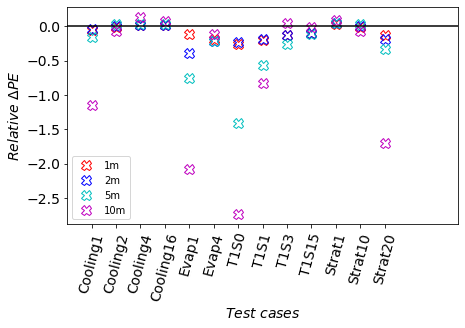

In [84]:
plt.figure(figsize=(7,4))
xaxis=np.arange(2,27,2)

datasets = [1, 2, 5, 10]
file_names = ["c1", "c2", "c4", "c16", 
              "e1", "e4", 
              "t1s0", "t1s1", "t1s3", "t1s15",
              "s1", "s10", "s20" ]

line_styles = ["Xr", "Xb", "Xc", "Xm"]


for fn, x in zip(file_names,xaxis):  
    for d, ls in zip(datasets, line_styles):
        #print(x, f"{fn}_{d}m")
        plt.plot(x,relative_errors_adc[f"{fn}_{d}m"], ls,markersize=10,markerfacecolor='none', linewidth=5)


plt.plot([0,32],[0,0],'-k')
plt.xticks([2,4,6,8,10,12,14,16,18,20,22,24,26], ['Cooling1', 'Cooling2', 'Cooling4','Cooling16','Evap1','Evap4','T1S0','T1S1','T1S3','T1S15','Strat1','Strat10','Strat20'],rotation=75,fontsize=14)
plt.ylabel("$Relative$ $\Delta PE$",fontsize=14)
plt.xlabel("$Test$ $cases$",fontsize=14);plt.legend(["1m","2m","5m","10m"])
plt.xlim(0,32)
#plt.ylim(-0.5,0.5)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

Text(0.5, 0.98, 'ADC')

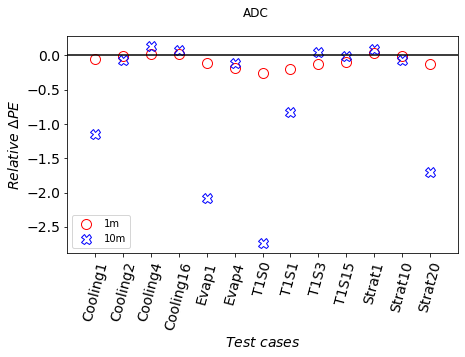

In [85]:
plt.figure(figsize=(7,4))
xaxis=np.arange(2,27,2)

datasets = [1,10]
file_names = ["c1", "c2", "c4", "c16", 
              "e1", "e4", 
              "t1s0", "t1s1", "t1s3", "t1s15",
              "s1", "s10", "s20" ]

#line_styles = ["Xr", "Xb", "Xc", "Xm"]
line_styles = ["or", "Xb" ]


for fn, x in zip(file_names,xaxis):  
    for d, ls in zip(datasets, line_styles):
        #print(x, f"{fn}_{d}m")
        plt.plot(x,relative_errors_adc[f"{fn}_{d}m"], ls,markersize=10,markerfacecolor='none', linewidth=5)


plt.plot([0,28],[0,0],'-k')
plt.xticks([2,4,6,8,10,12,14,16,18,20,22,24,26], ['Cooling1', 'Cooling2', 'Cooling4','Cooling16','Evap1','Evap4','T1S0','T1S1','T1S3','T1S15','Strat1','Strat10','Strat20'],rotation=75,fontsize=14)
plt.ylabel("$Relative$ $\Delta PE$",fontsize=14)
plt.xlabel("$Test$ $cases$",fontsize=14);plt.legend(["1m","10m"])
plt.xlim(0,28)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.suptitle("ADC")

[ -0.5  -1.5  -2.5  -3.5  -4.5  -5.5  -6.5  -7.5  -8.5  -9.5 -10.5 -11.5
 -12.5 -13.5 -14.5 -15.5 -16.5 -17.5 -18.5 -19.5 -20.5 -21.5 -22.5 -23.5
 -24.5 -25.5 -26.5 -27.5 -28.5 -29.5 -30.5 -31.5 -32.5 -33.5 -34.5 -35.5
 -36.5 -37.5 -38.5 -39.5 -40.5 -41.5 -42.5 -43.5 -44.5 -45.5 -46.5 -47.5
 -48.5 -49.5 -50.5 -51.5 -52.5 -53.5 -54.5 -55.5 -56.5 -57.5 -58.5 -59.5
 -60.5 -61.5 -62.5 -63.5 -64.5 -65.5 -66.5 -67.5 -68.5 -69.5 -70.5 -71.5
 -72.5 -73.5 -74.5 -75.5 -76.5 -77.5 -78.5 -79.5 -80.5 -81.5 -82.5 -83.5
 -84.5 -85.5 -86.5 -87.5 -88.5 -89.5 -90.5 -91.5 -92.5 -93.5 -94.5 -95.5
 -96.5 -97.5 -98.5 -99.5]
[ -5. -15. -25. -35. -45. -55. -65. -75. -85. -95.]
[ -0.5  -1.5  -2.5  -3.5  -4.5  -5.5  -6.5  -7.5  -8.5  -9.5 -10.5 -11.5
 -12.5 -13.5 -14.5 -15.5 -16.5 -17.5 -18.5 -19.5 -20.5 -21.5 -22.5 -23.5
 -24.5 -25.5 -26.5 -27.5 -28.5 -29.5 -30.5 -31.5 -32.5 -33.5 -34.5 -35.5
 -36.5 -37.5 -38.5 -39.5 -40.5 -41.5 -42.5 -43.5 -44.5 -45.5 -46.5 -47.5
 -48.5 -49.5 -50.5 -51.5 -52.5 -53.5 -54.5 -55

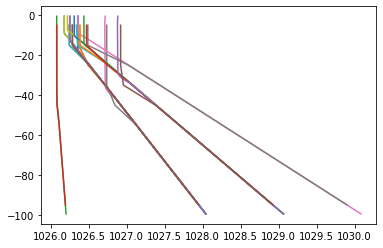

In [66]:
t=380 #95 hr
#t=360 #90 hr
t1=t-1 #83 hr # 12 hr avg
t1=288
#kpp
path_kpp="/Users/amrapallig/run/cvmix_analysis/les/KPP-CVMix/"

results_kpp = {}
file_names = [*[f"Cooling{x}" for x in [1, 2, 4, 16]], 
              *[f"Evap{x}" for x in [1, 4]],
              *[f"Strat{x}" for x in [1, 10, 20]],
              *[f"T1S{x}" for x in [0, 1, 3, 15]],
             ]
datasets = [1, 10]


for fn in file_names:
    mf1m = Dataset(path_kpp+f'VR1m/{fn}/gotm_out.nc', mode='r')
    mf10m = Dataset(path_kpp+f'VR10m/{fn}/gotm_out.nc', mode='r')
    if "Cooling" in fn:
        fn = fn.replace("Cooling", "c")
        dtdz=0.1; dsdz=0.0
    if "Evap" in fn:
        fn = fn.replace("Evap", "e")
        dtdz=0.0; dsdz=-0.025
    if "Strat" in fn:
        fn = fn.replace("Strat", "s")
        if "10" in fn:
            dtdz=0.1; dsdz=0.0
        elif "1" in fn:
            dtdz=0.01; dsdz=0.0
        elif "20" in fn:
            dtdz=0.2; dsdz=0.0
        else: 
            print("error",fn)
    if "T1S" in fn:
        fn = fn.replace("T1S", "t1s")
        dtdz=0.05; dsdz=-0.025


    # compute pot
    results_kpp[f"pe_{fn}_1m_kpp"] = pot_energy2(np.flip(mf1m.variables["temp"][0,:,0,0]),
                                             np.flip(np.nanmean(mf1m.variables["temp"][t1:t,:,0,0],axis=0)),
                                             np.flip(mf1m.variables["salt"][0,:,0,0]),
                                             np.flip(np.nanmean(mf1m.variables["salt"][t1:t,:,0,0],axis=0)),
                                             np.flip( mf1m.variables['z'][0,:,0,0]),
                                             dtdz,
                                             dsdz)
    results_kpp[f"pe_{fn}_10m_kpp"] = pot_energy2(np.flip(mf10m.variables["temp"][0,:,0,0]),
                                             np.flip(np.nanmean(mf10m.variables["temp"][t1:t,:,0,0],axis=0)),
                                             np.flip(mf10m.variables["salt"][0,:,0,0]),
                                             np.flip(np.nanmean(mf10m.variables["salt"][t1:t,:,0,0],axis=0)),
                                             np.flip(mf10m.variables['z'][0,:,0,0]),
                                             dtdz,
                                             dsdz)
#results_kpp

In [67]:
relative_errors_kpp = {}

# cooling
for les in [1, 2, 4, 16]:
    for adc in [1,10]:
        numerator = results_les[f"pe_c{les}_les"] - results_kpp[f"pe_c{les}_{adc}m_kpp"]
        relative_errors_kpp[f"c{les}_{adc}m"] = numerator/results_les[f"pe_c{les}_les"]
        
#  Evap
for les in [1, 4]:
    for adc in [1, 10]:
        numerator = results_les[f"pe_e{les}_les"] - results_kpp[f"pe_e{les}_{adc}m_kpp"]
        relative_errors_kpp[f"e{les}_{adc}m"] = numerator/results_les[f"pe_e{les}_les"]

#  Strat
for les in [1, 10, 20]:
    for adc in [1,10]:
        numerator = results_les[f"pe_s{les}_les"] - results_kpp[f"pe_s{les}_{adc}m_kpp"]
        relative_errors_kpp[f"s{les}_{adc}m"] = numerator/results_les[f"pe_s{les}_les"]
        
#  T1S
for les in [0, 1, 3, 15]:
    for adc in [1,10]:
        numerator = results_les[f"pe_t1s{les}_les"] - results_kpp[f"pe_t1s{les}_{adc}m_kpp"]
        relative_errors_kpp[f"t1s{les}_{adc}m"] = numerator/results_les[f"pe_t1s{les}_les"]

Text(0.5, 0.98, '$KPP$')

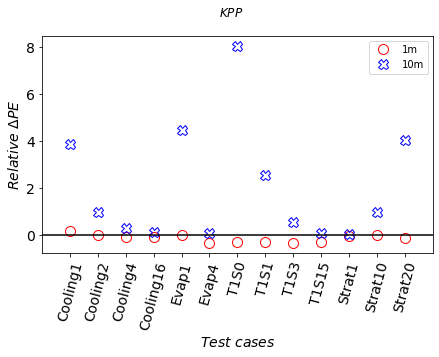

In [68]:
plt.figure(figsize=(7,4))
xaxis=np.arange(2,27,2)

datasets = [1, 10]
file_names = ["c1", "c2", "c4", "c16", 
              "e1", "e4", 
              "t1s0", "t1s1", "t1s3", "t1s15",
              "s1", "s10", "s20" ]

line_styles = ["or", "Xb" ]


for fn, x in zip(file_names,xaxis):  
    for d, ls in zip(datasets, line_styles):
        #print(x, f"{fn}_{d}m")
        plt.plot(x,relative_errors_kpp[f"{fn}_{d}m"], ls,markersize=10,markerfacecolor='none', linewidth=5)


plt.plot([0,28],[0,0],'-k')
plt.xticks([2,4,6,8,10,12,14,16,18,20,22,24,26], ['Cooling1', 'Cooling2', 'Cooling4','Cooling16','Evap1','Evap4','T1S0','T1S1','T1S3','T1S15','Strat1','Strat10','Strat20'],rotation=75,fontsize=14)
plt.ylabel("$Relative$ $\Delta PE$",fontsize=14)
plt.xlabel("$Test$ $cases$",fontsize=14);plt.legend(["1m","10m"])
plt.xlim(0,28)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.suptitle("$KPP$")

[ -0.5  -1.5  -2.5  -3.5  -4.5  -5.5  -6.5  -7.5  -8.5  -9.5 -10.5 -11.5
 -12.5 -13.5 -14.5 -15.5 -16.5 -17.5 -18.5 -19.5 -20.5 -21.5 -22.5 -23.5
 -24.5 -25.5 -26.5 -27.5 -28.5 -29.5 -30.5 -31.5 -32.5 -33.5 -34.5 -35.5
 -36.5 -37.5 -38.5 -39.5 -40.5 -41.5 -42.5 -43.5 -44.5 -45.5 -46.5 -47.5
 -48.5 -49.5 -50.5 -51.5 -52.5 -53.5 -54.5 -55.5 -56.5 -57.5 -58.5 -59.5
 -60.5 -61.5 -62.5 -63.5 -64.5 -65.5 -66.5 -67.5 -68.5 -69.5 -70.5 -71.5
 -72.5 -73.5 -74.5 -75.5 -76.5 -77.5 -78.5 -79.5 -80.5 -81.5 -82.5 -83.5
 -84.5 -85.5 -86.5 -87.5 -88.5 -89.5 -90.5 -91.5 -92.5 -93.5 -94.5 -95.5
 -96.5 -97.5 -98.5 -99.5]
[ -5. -15. -25. -35. -45. -55. -65. -75. -85. -95.]
[ -0.5  -1.5  -2.5  -3.5  -4.5  -5.5  -6.5  -7.5  -8.5  -9.5 -10.5 -11.5
 -12.5 -13.5 -14.5 -15.5 -16.5 -17.5 -18.5 -19.5 -20.5 -21.5 -22.5 -23.5
 -24.5 -25.5 -26.5 -27.5 -28.5 -29.5 -30.5 -31.5 -32.5 -33.5 -34.5 -35.5
 -36.5 -37.5 -38.5 -39.5 -40.5 -41.5 -42.5 -43.5 -44.5 -45.5 -46.5 -47.5
 -48.5 -49.5 -50.5 -51.5 -52.5 -53.5 -54.5 -55

{'pe_c1_1m_ke': 7.017543859649122e-05,
 'pe_c1_10m_ke': 7.017543859649122e-05,
 'pe_c2_1m_ke': 0.00018713450292397662,
 'pe_c2_10m_ke': 0.00011695906432748539,
 'pe_c4_1m_ke': 0.0005380116959064328,
 'pe_c4_10m_ke': 0.00023391812865497077,
 'pe_c16_1m_ke': 0.004280701754385965,
 'pe_c16_10m_ke': 0.004023391812865497,
 'pe_e1_1m_ke': 7.017543859649122e-05,
 'pe_e1_10m_ke': 7.017543859649122e-05,
 'pe_e4_1m_ke': 0.0005380116959064328,
 'pe_e4_10m_ke': 0.0002573099415204678,
 'pe_s1_1m_ke': 0.0005964912280701755,
 'pe_s1_10m_ke': 0.00011695906432748539,
 'pe_s10_1m_ke': 0.00018713450292397662,
 'pe_s10_10m_ke': 0.00011695906432748539,
 'pe_s20_1m_ke': 0.0001286549707602339,
 'pe_s20_10m_ke': 0.00011695906432748539,
 'pe_t1s0_1m_ke': 5.847953216374269e-05,
 'pe_t1s0_10m_ke': 5.847953216374269e-05,
 'pe_t1s1_1m_ke': 0.00015204678362573098,
 'pe_t1s1_10m_ke': 0.00011695906432748539,
 'pe_t1s3_1m_ke': 0.00044444444444444447,
 'pe_t1s3_10m_ke': 0.0002456140350877193,
 'pe_t1s15_1m_ke': 0.00359

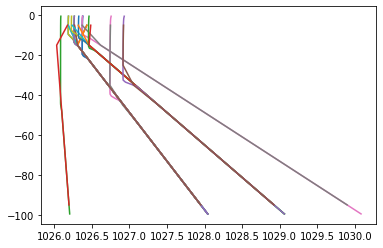

In [69]:
t=380 #95 hr
#t=360 #90 hr
t1=332 #83 hr #12 hr average

#ke


results_ke = {}
file_names = [*[f"Cooling{x}" for x in [1, 2, 4, 16]], 
              *[f"Evap{x}" for x in [1, 4]],
              *[f"Strat{x}" for x in [1, 10, 20]],
              *[f"T1S{x}" for x in [0, 1, 3, 15]],
             ]
datasets = [1, 10]


for fn in file_names:
    mf1m = Dataset(path_ke+f'VR1m/{fn}/gotm_out.nc', mode='r')
    mf10m = Dataset(path_ke+f'VR10m/{fn}/gotm_out.nc', mode='r')
    if "Cooling" in fn:
        fn = fn.replace("Cooling", "c")
        dtdz=0.1; dsdz=0.0
    if "Evap" in fn:
        fn = fn.replace("Evap", "e")
        dtdz=0.0; dsdz=-0.025
    if "Strat" in fn:
        fn = fn.replace("Strat", "s")
        if "10" in fn:
            dtdz=0.1; dsdz=0.0
        elif "1" in fn:
            dtdz=0.01; dsdz=0.0
        elif "20" in fn:
            dtdz=0.2; dsdz=0.0
        else: 
            print("error",fn)
    if "T1S" in fn:
        fn = fn.replace("T1S", "t1s")
        dtdz=0.05; dsdz=-0.025


    # compute pot
    results_ke[f"pe_{fn}_1m_ke"] = pot_energy2(np.flip(mf1m.variables["temp"][0,1:,0,0]),
                                             np.flip(np.nanmean(mf1m.variables["temp"][t1:t,1:,0,0],axis=0)),
                                             np.flip(mf1m.variables["salt"][0,1:,0,0]),
                                             np.flip(np.nanmean(mf1m.variables["salt"][t1:t,1:,0,0],axis=0)),
                                             np.flip(mf1m.variables['z'][0,1:,0,0]),
                                             dtdz,
                                             dsdz)
    results_ke[f"pe_{fn}_10m_ke"] = pot_energy2(np.flip(mf10m.variables["temp"][0,1:,0,0]),
                                             np.flip(np.nanmean(mf10m.variables["temp"][t1:t,1:,0,0],axis=0)),
                                             np.flip(mf10m.variables["salt"][0,1:,0,0]),
                                             np.flip(np.nanmean(mf10m.variables["salt"][t1:t,1:,0,0],axis=0)),
                                             np.flip(mf10m.variables['z'][0,1:,0,0]),
                                             dtdz,
                                             dsdz)
results_ke

In [70]:
relative_errors_ke = {}

# cooling
for les in [1, 2, 4, 16]:
    for adc in [1,10]:
        numerator = results_les[f"pe_c{les}_les"] - results_ke[f"pe_c{les}_{adc}m_ke"]
        relative_errors_ke[f"c{les}_{adc}m"] = numerator/results_les[f"pe_c{les}_les"]
        
#  Evap
for les in [1, 4]:
    for adc in [1, 10]:
        numerator = results_les[f"pe_e{les}_les"] - results_ke[f"pe_e{les}_{adc}m_ke"]
        relative_errors_ke[f"e{les}_{adc}m"] = numerator/results_les[f"pe_e{les}_les"]

#  Strat
for les in [1, 10, 20]:
    for adc in [1,10]:
        numerator = results_les[f"pe_s{les}_les"] - results_ke[f"pe_s{les}_{adc}m_ke"]
        relative_errors_ke[f"s{les}_{adc}m"] = numerator/results_les[f"pe_s{les}_les"]
        
#  T1S
for les in [0, 1, 3, 15]:
    for adc in [1,10]:
        numerator = results_les[f"pe_t1s{les}_les"] - results_ke[f"pe_t1s{les}_{adc}m_ke"]
        relative_errors_ke[f"t1s{les}_{adc}m"] = numerator/results_les[f"pe_t1s{les}_les"]
relative_errors_ke        

{'c1_1m': -0.22697264651199092,
 'c1_10m': -0.22697264651199092,
 'c2_1m': -0.1539606725373183,
 'c2_10m': 0.27877457966417607,
 'c4_1m': -0.16729889422965868,
 'c4_10m': 0.49247874163927885,
 'c16_1m': -0.1578316050629957,
 'c16_10m': -0.08823516978598518,
 'e1_1m': -0.4907971216263706,
 'e1_10m': -0.4907971216263706,
 'e4_1m': -0.41090598367037356,
 'e4_10m': 0.3252188773750388,
 's1_1m': -0.15080094790242268,
 's1_10m': 0.7743527553132504,
 's10_1m': -0.1539606725373183,
 's10_10m': 0.27877457966417607,
 's20_1m': -0.12420705732800841,
 's20_10m': -0.022006415752735035,
 't1s0_1m': -0.3076469071762383,
 't1s0_10m': -0.3076469071762383,
 't1s1_1m': -0.27883178217492377,
 't1s1_10m': 0.016283244480827744,
 't1s3_1m': -0.3577421353498784,
 't1s3_10m': 0.2496688199382251,
 't1s15_1m': -0.3875449435791131,
 't1s15_10m': -0.27907237469996415}

Text(0.5, 0.98, '$k-\\epsilon$')

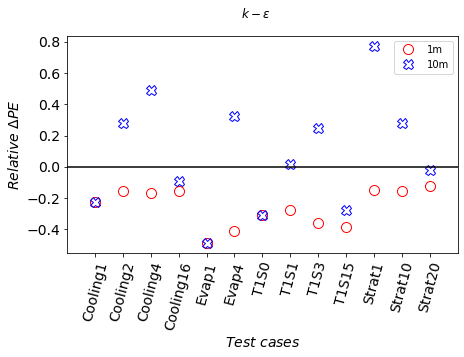

In [71]:
plt.figure(figsize=(7,4))
xaxis=np.arange(2,27,2)

datasets = [1, 10]
file_names = ["c1", "c2", "c4", "c16", 
              "e1", "e4", 
              "t1s0", "t1s1", "t1s3", "t1s15",
              "s1", "s10", "s20" ]

line_styles = ["or", "Xb", ]

for fn, x in zip(file_names,xaxis):  
    for d, ls in zip(datasets, line_styles):
        #print(x, f"{fn}_{d}m")
        plt.plot(x,relative_errors_ke[f"{fn}_{d}m"], ls,markersize=10,markerfacecolor='none', linewidth=5)


plt.plot([0,28],[0,0],'-k')
plt.xticks([2,4,6,8,10,12,14,16,18,20,22,24,26], ['Cooling1', 'Cooling2', 'Cooling4','Cooling16','Evap1','Evap4','T1S0','T1S1','T1S3','T1S15','Strat1','Strat10','Strat20'],rotation=75,fontsize=14)
plt.ylabel("$Relative$ $\Delta PE$",fontsize=14)
plt.xlabel("$Test$ $cases$",fontsize=14);plt.legend(["1m","10m"])
plt.xlim(0,28)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.suptitle("$k-\epsilon$")

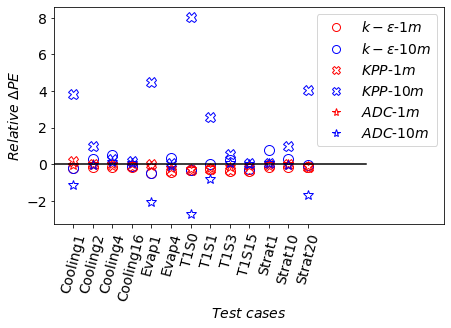

In [72]:
#all data in one plot for relative delta PE

plt.figure(figsize=(7,4))
xaxis=np.arange(2,27,2)

datasets = [1, 10]
file_names = ["c1", "c2", "c4", "c16", 
              "e1", "e4", 
              "t1s0", "t1s1", "t1s3", "t1s15",
              "s1", "s10", "s20" ]
line_styles1 = ["or", "ob", ]
line_styles2 = ["Xr", "Xb", ]
line_styles3 = ["*r", "*b", ]

for fn, x in zip(file_names,xaxis):  
    for d, ls in zip(datasets, line_styles1):
        #print(x, f"{fn}_{d}m")
        plt.plot(x,relative_errors_ke[f"{fn}_{d}m"], ls,markersize=10,markerfacecolor='none', linewidth=5)

for fn, x in zip(file_names,xaxis):  
    for d, ls in zip(datasets, line_styles2):
        #print(x, f"{fn}_{d}m")
        plt.plot(x,relative_errors_kpp[f"{fn}_{d}m"], ls,markersize=10,markerfacecolor='none', linewidth=5)

for fn, x in zip(file_names,xaxis):  
    for d, ls in zip(datasets, line_styles3):
        #print(x, f"{fn}_{d}m")
        plt.plot(x,relative_errors_adc[f"{fn}_{d}m"], ls,markersize=10,markerfacecolor='none', linewidth=5)

plt.plot([0,32],[0,0],'-k')
plt.xticks([2,4,6,8,10,12,14,16,18,20,22,24,26], ['Cooling1', 'Cooling2', 'Cooling4','Cooling16','Evap1','Evap4','T1S0','T1S1','T1S3','T1S15','Strat1','Strat10','Strat20'],rotation=75,fontsize=14)
plt.ylabel("$Relative$ $\Delta PE$",fontsize=14)
plt.xlabel("$Test$ $cases$",fontsize=14);

plt.xlim(0,40)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

legend_elements2 = [ Line2D([0], [0], marker='o', color='w', label='$k-\epsilon$-$1 m$',markeredgecolor='r',markerfacecolor='none', markersize=8),
                  Line2D([0], [0], marker='o', color='w', label='$k-\epsilon$-$10 m$',markeredgecolor='b',markerfacecolor='none', markersize=8),
                  Line2D([0], [0], marker='X', color='w', label='$KPP$-$1 m$',markeredgecolor='r',markerfacecolor='none', markersize=8),
                  Line2D([0], [0], marker='X', color='w', label='$KPP$-$10 m$',markeredgecolor='b',markerfacecolor='none', markersize=8),
                Line2D([0], [0], marker='*', color='w', label='$ADC$-$1 m$',markeredgecolor='r',markerfacecolor='none', markersize=8),
                  Line2D([0], [0], marker='*', color='w', label='$ADC$-$10 m$',markeredgecolor='b',markerfacecolor='none', markersize=8)]

legend3=plt.legend(handles=legend_elements2,fontsize=14)
#plt.ylim(-2,2)

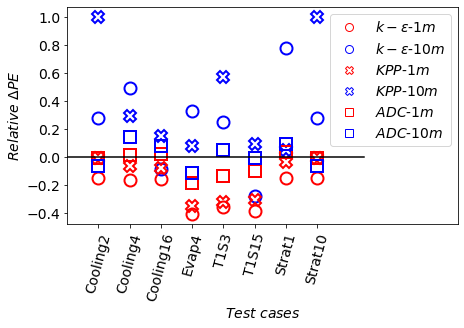

In [73]:
#all data in one plot for relative delta PE

plt.figure(figsize=(7,4))
xaxis=np.arange(2,27,2)*2

datasets = [1,10]
file_names = [ "c2","c4", "c16", 
               "e4", 
               "t1s3", "t1s15",
               "s1","s10" ]

line_styles1 = ["or", "ob", ]
line_styles2 = ["Xr", "Xb", ]
line_styles3 = ["sr", "sb", ]

for fn, x in zip(file_names,xaxis):  
    for d, ls in zip(datasets, line_styles1):
        #print(x, f"{fn}_{d}m")
        plt.plot(x,relative_errors_ke[f"{fn}_{d}m"], ls,markersize=12,markerfacecolor='none', markeredgewidth=2)

for fn, x in zip(file_names,xaxis):  
    for d, ls in zip(datasets, line_styles2):
        #print(x, f"{fn}_{d}m")
        plt.plot(x,relative_errors_kpp[f"{fn}_{d}m"], ls,markersize=12,markerfacecolor='none', markeredgewidth=2)

for fn, x in zip(file_names,xaxis):  
    for d, ls in zip(datasets, line_styles3):
        #print(x, f"{fn}_{d}m")
        plt.plot(x,relative_errors_adc[f"{fn}_{d}m"], ls,markersize=12,markerfacecolor='none', markeredgewidth=2)

plt.plot([0,38],[0,0],'-k')
plt.xticks([2*2,4*2,6*2,8*2,10*2,12*2,14*2,16*2], ['Cooling2', 'Cooling4','Cooling16','Evap4','T1S3','T1S15','Strat1','Strat10'],rotation=75,fontsize=14)
plt.ylabel("$Relative$ $\Delta PE$",fontsize=14)
plt.xlabel("$Test$ $cases$",fontsize=14);

plt.xlim(0,50)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

legend_elements2 = [ Line2D([0], [0], marker='o', color='w', label='$k-\epsilon$-$1 m$',markeredgecolor='r',markerfacecolor='none', markersize=8),
                  Line2D([0], [0], marker='o', color='w', label='$k-\epsilon$-$10 m$',markeredgecolor='b',markerfacecolor='none', markersize=8),
                  Line2D([0], [0], marker='X', color='w', label='$KPP$-$1 m$',markeredgecolor='r',markerfacecolor='none', markersize=8),
                  Line2D([0], [0], marker='X', color='w', label='$KPP$-$10 m$',markeredgecolor='b',markerfacecolor='none', markersize=8),
                Line2D([0], [0], marker='s', color='w', label='$ADC$-$1 m$',markeredgecolor='r',markerfacecolor='none', markersize=8),
                  Line2D([0], [0], marker='s', color='w', label='$ADC$-$10 m$',markeredgecolor='b',markerfacecolor='none', markersize=8)]

legend3=plt.legend(handles=legend_elements2,fontsize=14)
#plt.ylim(-0.5,1.5)

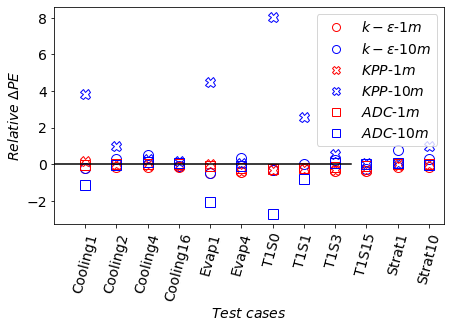

In [74]:
#all data in one plot for relative delta PE

plt.figure(figsize=(7,4))
xaxis=np.arange(2,27,2)*2

datasets = [1,10]
file_names = [ "c1","c2","c4", "c16", 
               "e1","e4", 
               "t1s0","t1s1","t1s3", "t1s15",
               "s1","s10" ,"s20"]

line_styles1 = ["or", "ob", ]
line_styles2 = ["Xr", "Xb", ]
line_styles3 = ["sr", "sb", ]

for fn, x in zip(file_names,xaxis):  
    for d, ls in zip(datasets, line_styles1):
        #print(x, f"{fn}_{d}m")
        plt.plot(x,relative_errors_ke[f"{fn}_{d}m"], ls,markersize=10,markerfacecolor='none', linewidth=5)

for fn, x in zip(file_names,xaxis):  
    for d, ls in zip(datasets, line_styles2):
        #print(x, f"{fn}_{d}m")
        plt.plot(x,relative_errors_kpp[f"{fn}_{d}m"], ls,markersize=10,markerfacecolor='none', linewidth=5)

for fn, x in zip(file_names,xaxis):  
    for d, ls in zip(datasets, line_styles3):
        #print(x, f"{fn}_{d}m")
        plt.plot(x,relative_errors_adc[f"{fn}_{d}m"], ls,markersize=10,markerfacecolor='none', linewidth=5)

plt.plot([0,38],[0,0],'-k')
plt.xticks([2*2,4*2,6*2,8*2,10*2,12*2,14*2,16*2,18*2,20*2,22*2,24*2, 26*2], ['Cooling1','Cooling2', 'Cooling4','Cooling16','Evap1','Evap4','T1S0','T1S1','T1S3','T1S15','Strat1','Strat10','Strat20'],rotation=75,fontsize=14)
plt.ylabel("$Relative$ $\Delta PE$",fontsize=14)
plt.xlabel("$Test$ $cases$",fontsize=14);

plt.xlim(0,50)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

legend_elements2 = [ Line2D([0], [0], marker='o', color='w', label='$k-\epsilon$-$1 m$',markeredgecolor='r',markerfacecolor='none', markersize=8),
                  Line2D([0], [0], marker='o', color='w', label='$k-\epsilon$-$10 m$',markeredgecolor='b',markerfacecolor='none', markersize=8),
                  Line2D([0], [0], marker='X', color='w', label='$KPP$-$1 m$',markeredgecolor='r',markerfacecolor='none', markersize=8),
                  Line2D([0], [0], marker='X', color='w', label='$KPP$-$10 m$',markeredgecolor='b',markerfacecolor='none', markersize=8),
                Line2D([0], [0], marker='s', color='w', label='$ADC$-$1 m$',markeredgecolor='r',markerfacecolor='none', markersize=8),
                  Line2D([0], [0], marker='s', color='w', label='$ADC$-$10 m$',markeredgecolor='b',markerfacecolor='none', markersize=8)]

legend3=plt.legend(handles=legend_elements2,fontsize=14)
#plt.ylim(-0.5,1.5)

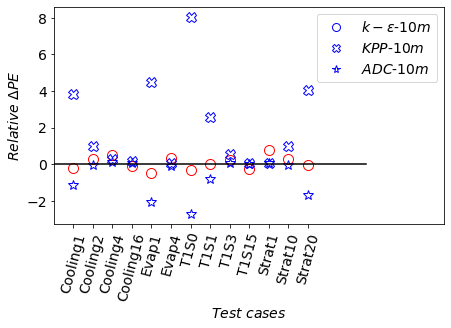

In [75]:
#all data in one plot for relative delta PE

plt.figure(figsize=(7,4))
xaxis=np.arange(2,27,2)

datasets = [10]
file_names = ["c1", "c2", "c4", "c16", 
              "e1", "e4", 
              "t1s0", "t1s1", "t1s3", "t1s15",
              "s1", "s10", "s20" ]
line_styles1 = ["or", "ob", ]
line_styles2 = ["Xb", "Xb", ]
line_styles3 = ["*b", "*b", ]

for fn, x in zip(file_names,xaxis):  
    for d, ls in zip(datasets, line_styles1):
        #print(x, f"{fn}_{d}m")
        plt.plot(x,relative_errors_ke[f"{fn}_{d}m"], ls,markersize=10,markerfacecolor='none', linewidth=5)

for fn, x in zip(file_names,xaxis):  
    for d, ls in zip(datasets, line_styles2):
        #print(x, f"{fn}_{d}m")
        plt.plot(x,relative_errors_kpp[f"{fn}_{d}m"], ls,markersize=10,markerfacecolor='none', linewidth=5)

for fn, x in zip(file_names,xaxis):  
    for d, ls in zip(datasets, line_styles3):
        #print(x, f"{fn}_{d}m")
        plt.plot(x,relative_errors_adc[f"{fn}_{d}m"], ls,markersize=10,markerfacecolor='none', linewidth=5)

plt.plot([0,32],[0,0],'-k')
plt.xticks([2,4,6,8,10,12,14,16,18,20,22,24,26], ['Cooling1', 'Cooling2', 'Cooling4','Cooling16','Evap1','Evap4','T1S0','T1S1','T1S3','T1S15','Strat1','Strat10','Strat20'],rotation=75,fontsize=14)
plt.ylabel("$Relative$ $\Delta PE$",fontsize=14)
plt.xlabel("$Test$ $cases$",fontsize=14);

plt.xlim(0,40)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

legend_elements2 = [# Line2D([0], [0], marker='o', color='w', label='$k-\epsilon$-$1 m$',markeredgecolor='r',markerfacecolor='none', markersize=8),
                  Line2D([0], [0], marker='o', color='w', label='$k-\epsilon$-$10 m$',markeredgecolor='b',markerfacecolor='none', markersize=8),
                 # Line2D([0], [0], marker='X', color='w', label='$KPP$-$1 m$',markeredgecolor='b',markerfacecolor='none', markersize=8),
                  Line2D([0], [0], marker='X', color='w', label='$KPP$-$10 m$',markeredgecolor='b',markerfacecolor='none', markersize=8),
                #Line2D([0], [0], marker='*', color='w', label='$ADC$-$1 m$',markeredgecolor='c',markerfacecolor='none', markersize=8)]
                  Line2D([0], [0], marker='*', color='w', label='$ADC$-$10 m$',markeredgecolor='b',markerfacecolor='none', markersize=8)]

legend3=plt.legend(handles=legend_elements2,fontsize=14)
#plt.ylim(-1,1)